# Data Cleaning
## NYC Open *Big* Data Analysis
Author: Mark Bauer

Objective: Clean data to use for analysis.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p pandas,geopandas,duckdb,urllib.request,seaborn,matplotlib

printing packages and versions:

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

pandas        : 1.5.1
geopandas     : 0.12.1
duckdb        : 1.0.0
urllib.request: 3.11
seaborn       : 0.12.1
matplotlib    : 3.6.2



In [3]:
# list files in directory
%ls

LICENSE              data/                figures/
README.md            data-cleaning.ipynb  log.txt
analysis.ipynb       data-export.ipynb


In [4]:
# list files in data directory
%ls data/

data.csv


In [5]:
df = pd.read_csv('data/data.csv')

print(df.shape)
df.head()

(2491, 18)


,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted
0,fkec-mjr6,"DOHMH Cryptosporidiosis by Race/Ethnicity, Age...",Department of Health and Mental Hygiene (DOHMH),"Cryptosporidiosis, number of cases and annual ...",182,99,9,Health,"['cryptosporidiosis', 'diagnosis year', 'race ...",2024-08-05T14:12:47+0000,2024-08-05T16:34:05+0000,2024-08-05T16:04:46+0000,2024-08-05T16:33:29+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/fkec-mjr6,https://data.cityofnewyork.us/resource/fkec-mjr6,Department of Health and Mental Hygiene (DOHMH)
1,mzxg-pwib,New York City Bike Routes,Department of Transportation (DOT),The New York City Department of Transportation...,27673,619,134,NaN,"['nyc bike routes', 'bike routes']",2024-07-24T15:57:31+0000,2024-07-30T00:51:27+0000,2024-07-24T16:06:04+0000,2024-07-30T00:50:54+0000,data.cityofnewyork.us,https://www.nyc.gov/html/dot/html/bicyclists/b...,https://data.cityofnewyork.us/d/mzxg-pwib,https://data.cityofnewyork.us/resource/mzxg-pwib,Department of Transportation (DOT)
2,6r9j-qrwz,DSNY Disposal Facilities Used by Year,NYC Department of Sanitation (DSNY),A listing of the facilities used by year to ha...,91,106,17,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T18:37:24+0000,2024-07-31T19:51:22+0000,2024-07-31T14:21:50+0000,2024-07-31T19:45:38+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/6r9j-qrwz,https://data.cityofnewyork.us/resource/6r9j-qrwz,NYC Department of Sanitation (DSNY)
3,99xv-he3n,DSNY Disposal Sites Used by Facilities by Year,NYC Department of Sanitation (DSNY),A listing of the disposal sites used by each f...,188,75,15,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T18:18:59+0000,2024-07-31T19:51:26+0000,2024-07-31T14:18:13+0000,2024-07-31T19:44:47+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/99xv-he3n,https://data.cityofnewyork.us/resource/99xv-he3n,NYC Department of Sanitation (DSNY)
4,ufxk-pq9j,Location of Disposal Facilities and Sites Used...,NYC Department of Sanitation (DSNY),The location of the disposal facilities where ...,39,92,28,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T17:54:05+0000,2024-07-31T19:51:24+0000,2024-07-31T14:33:03+0000,2024-07-31T19:45:15+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/ufxk-pq9j,https://data.cityofnewyork.us/resource/ufxk-pq9j,NYC Department of Sanitation (DSNY)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491 entries, 0 to 2490
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2491 non-null   object
 1   name                   2491 non-null   object
 2   attribution            2365 non-null   object
 3   description            2419 non-null   object
 4   count_rows             2491 non-null   int64 
 5   viewCount              2491 non-null   int64 
 6   downloadCount          2491 non-null   int64 
 7   category               2404 non-null   object
 8   tags                   1901 non-null   object
 9   createdAt              2491 non-null   object
 10  updatedAt              2491 non-null   object
 11  dataUpdatedAt          2471 non-null   object
 12  metadataUpdatedAt      2491 non-null   object
 13  domain                 2491 non-null   object
 14  attributionLink        358 non-null    object
 15  webUri               

In [7]:
df.isnull().sum()

id                          0
name                        0
attribution               126
description                72
count_rows                  0
viewCount                   0
downloadCount               0
category                   87
tags                      590
createdAt                   0
updatedAt                   0
dataUpdatedAt              20
metadataUpdatedAt           0
domain                      0
attributionLink          2133
webUri                      0
dataUri                     0
attribution_formatted     126
dtype: int64

In [8]:
df.describe()

,count_rows,viewCount,downloadCount
count,2.491000e+03,2.491000e+03,2.491000e+03
mean,2.394917e+06,1.114482e+04,4.628470e+03
std,1.831006e+07,1.085471e+05,4.103054e+04
min,1.000000e+00,5.100000e+01,9.000000e+00
25%,1.620000e+02,3.780000e+02,3.835000e+02
50%,1.531000e+03,8.590000e+02,8.050000e+02
75%,1.275950e+04,2.626500e+03,2.119500e+03
max,3.764045e+08,2.813069e+06,1.664776e+06


In [9]:
df.describe(include='object')

,id,name,attribution,description,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted
count,2491,2491,2365,2419,2404,1901,2491,2491,2471,2491,2491,358,2491,2491,2365
unique,2491,2484,200,2081,11,1396,2488,1890,2469,1892,1,183,2491,2491,197
top,fkec-mjr6,Students Receiving Recommended Special Educati...,NYC Department of Education,The Department of Finance (DOF) is required by...,Education,['lifelong learning'],2013-04-18T15:18:56+0000,2022-09-23T19:23:10+0000,2024-06-20T18:51:01+0000,2022-09-23T19:23:10+0000,data.cityofnewyork.us,http://schools.nyc.gov,https://data.cityofnewyork.us/d/fkec-mjr6,https://data.cityofnewyork.us/resource/fkec-mjr6,NYC Department of Education
freq,1,2,423,26,812,26,2,15,2,15,2491,38,1,1,426


In [10]:
df.loc[df['attribution'].isnull()].head()

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted
186,hgx4-8ukb,Zoning Application Portal (ZAP) - Project Data,NaN,The Department of City Planning (DCP) processe...,32601,1157,284,City Government,"['zap', 'zoning application portal', 'land use...",2022-08-17T14:27:25+0000,2024-08-19T07:01:22+0000,2024-08-19T07:01:29+0000,2024-08-19T07:01:22+0000,data.cityofnewyork.us,https://zap.planning.nyc.gov/projects,https://data.cityofnewyork.us/d/hgx4-8ukb,https://data.cityofnewyork.us/resource/hgx4-8ukb,NaN
239,bbtf-6p3c,Schoolyard to Playgrounds,NaN,The Schoolyards to Playgrounds initiative bega...,285,756,450,NaN,NaN,2022-04-01T14:29:49+0000,2024-08-14T13:24:42+0000,2024-08-14T13:24:43+0000,2024-08-14T13:24:42+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/bbtf-6p3c,https://data.cityofnewyork.us/resource/bbtf-6p3c,NaN
240,mk9u-qu7i,Greenstreets,NaN,"Launched in 1996, the Greenstreets program beg...",2753,1251,529,NaN,NaN,2022-03-31T22:05:41+0000,2024-08-14T13:49:57+0000,2024-08-14T13:50:01+0000,2024-08-14T13:49:57+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/mk9u-qu7i,https://data.cityofnewyork.us/resource/mk9u-qu7i,NaN
241,uwmn-v7un,Golf Courses,NaN,This dataset consists of golf courses under th...,19,517,443,NaN,NaN,2022-03-31T21:55:29+0000,2024-08-14T13:49:34+0000,2024-08-14T13:49:35+0000,2024-08-14T13:49:34+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/uwmn-v7un,https://data.cityofnewyork.us/resource/uwmn-v7un,NaN
242,ijwa-mn2v,Beaches,NaN,Larger beach properties are typically divided ...,175,653,353,NaN,NaN,2022-03-31T21:38:39+0000,2024-08-14T13:49:22+0000,2024-08-14T13:49:22+0000,2024-08-14T13:49:22+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/ijwa-mn2v,https://data.cityofnewyork.us/resource/ijwa-mn2v,NaN


In [11]:
df['full_name'] = df['name'] + "\n" + df['attribution'].fillna("N/A")

df['full_name'].head()

0    DOHMH Cryptosporidiosis by Race/Ethnicity, Age...
1    New York City Bike Routes\nDepartment of Trans...
2    DSNY Disposal Facilities Used by Year\nNYC Dep...
3    DSNY Disposal Sites Used by Facilities by Year...
4    Location of Disposal Facilities and Sites Used...
Name: full_name, dtype: object

In [12]:
# examine really small datasets
df.sort_values(by='count_rows').head(10)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted,full_name
139,32rn-zwi7,Capacity Supporting Transportable Classroom Un...,School Construction Authority (SCA),This category funds the construction of additi...,1,172,129,Education,"['capacity supporting tcu removal', 'tcu remov...",2023-02-08T20:04:54+0000,2023-07-18T16:20:08+0000,2023-06-07T21:08:23+0000,2023-07-18T16:20:08+0000,data.cityofnewyork.us,http://www.nycsca.org/Community/Capital-Plan-R...,https://data.cityofnewyork.us/d/32rn-zwi7,https://data.cityofnewyork.us/resource/32rn-zwi7,School Construction Authority (SCA),Capacity Supporting Transportable Classroom Un...
2108,sgpi-7kic,NEW_JERSEY_TRANSIT_STATION,Office of Technology and Innovation (OTI),New Jersey Transit Station,1,128,813,City Government,"['doitt gis', 'doittgis', 'new jersey transit ...",2014-11-18T00:39:03+0000,2024-02-02T18:45:28+0000,NaN,2024-02-02T18:45:28+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/sgpi-7kic,https://data.cityofnewyork.us/resource/sgpi-7kic,Office of Technology and Innovation (OTI),NEW_JERSEY_TRANSIT_STATION\nOffice of Technolo...
446,mpbx-6c9k,Mayor's Office to End Domestic and Gender-Base...,Mayor's Office to End Domestic and Gender-Base...,The dataset contains annual count data for the...,1,252,215,Public Safety,"['endgbv', 'cosmetologists']",2021-06-11T18:48:15+0000,2024-01-31T19:04:45+0000,2021-06-11T18:51:04+0000,2024-01-31T19:04:45+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/mpbx-6c9k,https://data.cityofnewyork.us/resource/mpbx-6c9k,Mayor's Office to End Domestic and Gender-Base...,Mayor's Office to End Domestic and Gender-Base...
677,wnhn-bgpv,Shapefiles of BOA and Community Brownfield Pla...,Mayor's Office of Environmental Remediation (OER),GIS shapefiles showing the areas in NYC where ...,1,316,247,Environment,"['moer', 'oer', 'boa']",2020-11-24T14:57:47+0000,2024-01-31T17:32:29+0000,2020-11-24T15:02:12+0000,2024-01-31T17:32:29+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/wnhn-bgpv,https://data.cityofnewyork.us/resource/wnhn-bgpv,Mayor's Office of Environmental Remediation (OER),Shapefiles of BOA and Community Brownfield Pla...
945,e6ph-9uv7,Brooklyn Borough President's Office Legislatio...,Brooklyn Borough President,List of legislation that was sponsored by the ...,2,312,521,City Government,"['borough president', 'legislation', 'brooklyn']",2019-10-29T15:38:14+0000,2022-05-09T22:20:31+0000,2019-10-29T15:41:50+0000,2022-05-09T22:20:31+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/e6ph-9uv7,https://data.cityofnewyork.us/resource/e6ph-9uv7,Brooklyn Borough President,Brooklyn Borough President's Office Legislatio...
2244,37fm-7uaa,NYCHA Customer Contact Centers,New York City Housing Authority (NYCHA),"The customer contact center locations, phone ...",2,4324,3679,City Government,"['nycha', 'nyc housing', 'government service',...",2013-03-28T19:11:18+0000,2022-05-09T22:27:49+0000,2017-09-14T20:03:04+0000,2022-05-09T22:27:49+0000,data.cityofnewyork.us,http://www.nyc.gov/html/nycha/html/residents/m...,https://data.cityofnewyork.us/d/37fm-7uaa,https://data.cityofnewyork.us/resource/37fm-7uaa,New York City Housing Authority (NYCHA),NYCHA Customer Contact Centers\nNew York City ...
1462,b36s-tuqc,2016-2017 Student Discipline Annual Report - T...,NYC Department of Education,Students discipline annual report of voluntary...,2,325,434,Education,NaN,2018-06-07T23:40:40+0000,2024-07-05T13:43:27+0000,2018-06-07T23:40:42+0000,2024-07-05T13:43:27+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/b36s-tuqc,https://data.cityofnewyork.us/resource/b36s-tuqc,NYC Department of Education,2016-2017 Student Discipline Annual Report - T...
2111,3q66-h7aj,AIRPORT_POINT,Metropolitan Transit Authority (MTA),Airport Point,2,101,737,City Government,"['doitt gis', 'doittgis', 'airpor

# Statistics About NYC Open Data

In [13]:
data = {
    'Metric': [
        'Number of datasets',
        'Number of agencies',
        'Number of rows',
        'Number of views',
        'Number of downloads'
    ],
    'Value': [
        df.shape[0],
        len(df['attribution'].unique()),
        df['count_rows'].sum(),
        df['viewCount'].sum(),
        df['downloadCount'].sum()
    ]
}

print(pd.DataFrame(data).to_markdown(index=False))

| Metric              |      Value |
|:--------------------|-----------:|
| Number of datasets  |       2491 |
| Number of agencies  |        201 |
| Number of rows      | 5965739051 |
| Number of views     |   27761756 |
| Number of downloads |   11529518 |


In [14]:
df['createdAtYear'] = pd.to_datetime(df['createdAt']).dt.year

df.head()

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted,full_name,createdAtYear
0,fkec-mjr6,"DOHMH Cryptosporidiosis by Race/Ethnicity, Age...",Department of Health and Mental Hygiene (DOHMH),"Cryptosporidiosis, number of cases and annual ...",182,99,9,Health,"['cryptosporidiosis', 'diagnosis year', 'race ...",2024-08-05T14:12:47+0000,2024-08-05T16:34:05+0000,2024-08-05T16:04:46+0000,2024-08-05T16:33:29+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/fkec-mjr6,https://data.cityofnewyork.us/resource/fkec-mjr6,Department of Health and Mental Hygiene (DOHMH),"DOHMH Cryptosporidiosis by Race/Ethnicity, Age...",2024
1,mzxg-pwib,New York City Bike Routes,Department of Transportation (DOT),The New York City Department of Transportation...,27673,619,134,NaN,"['nyc bike routes', 'bike routes']",2024-07-24T15:57:31+0000,2024-07-30T00:51:27+0000,2024-07-24T16:06:04+0000,2024-07-30T00:50:54+0000,data.cityofnewyork.us,https://www.nyc.gov/html/dot/html/bicyclists/b...,https://data.cityofnewyork.us/d/mzxg-pwib,https://data.cityofnewyork.us/resource/mzxg-pwib,Department of Transportation (DOT),New York City Bike Routes\nDepartment of Trans...,2024
2,6r9j-qrwz,DSNY Disposal Facilities Used by Year,NYC Department of Sanitation (DSNY),A listing of the facilities used by year to ha...,91,106,17,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T18:37:24+0000,2024-07-31T19:51:22+0000,2024-07-31T14:21:50+0000,2024-07-31T19:45:38+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/6r9j-qrwz,https://data.cityofnewyork.us/resource/6r9j-qrwz,NYC Department of Sanitation (DSNY),DSNY Disposal Facilities Used by Year\nNYC Dep...,2024
3,99xv-he3n,DSNY Disposal Sites Used by Facilities by Year,NYC Department of Sanitation (DSNY),A listing of the disposal sites used by each f...,188,75,15,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T18:18:59+0000,2024-07-31T19:51:26+0000,2024-07-31T14:18:13+0000,2024-07-31T19:44:47+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/99xv-he3n,https://data.cityofnewyork.us/resource/99xv-he3n,NYC Department of Sanitation (DSNY),DSNY Disposal Sites Used by Facilities by Year...,2024
4,ufxk-pq9j,Location of Disposal Facilities and Sites Used...,NYC Department of Sanitation (DSNY),The location of the disposal facilities where ...,39,92,28,City Government,"['sanitation', 'waste', 'transfer station', 'w...",2024-07-12T17:54:05+0000,2024-07-31T19:51:24+0000,2024-07-31T14:33:03+0000,2024-07-31T19:45:15+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/ufxk-pq9j,https://data.cityofnewyork.us/resource/ufxk-pq9j,NYC Department of Sanitation (DSNY),Location of Disposal Facilities and Sites Used...,2024


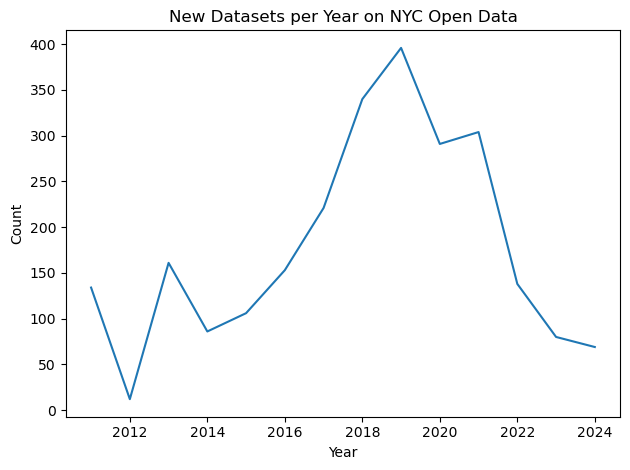

In [15]:
data = (
    df
    .groupby(by='createdAtYear')['id']
    .count()
    .sort_index()
    .rename('count')
)

sns.lineplot(data=data)

plt.title('New Datasets per Year on NYC Open Data')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('figures/new-datasets.png', bbox_inches='tight', dpi=200)

# Largest Datasets on NYC Open Data

## Largest Dataset

In [16]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(1)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted,full_name,createdAtYear
1869,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1860,506,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,Department of Sanitation (DSNY),DSNY - PlowNYC Data\nDepartment of Sanitation ...,2016


In [17]:
description = (
    df
    .sort_values(by='count_rows', ascending=False)
    .head(1)
    .loc[:, 'description']
    .values[0]
)

print(description)

A table containing physical ID (a unique street segment identifier) and the date/time with which it was last associated with a GPS signal emitted by a NYC Department of Sanitation (DSNY) snow clearing vehicle. The PlowNYC website (https://plownyc.cityofnewyork.us/plownyc/) allows you to track the progress of DSNY snow removal vehicles. To learn more about DSNY’s Snow Response, visit: https://www.nyc.gov/site/dsny/what-we-do/snow-response.page.


In [18]:
counts = (
    df
    .sort_values(by='count_rows', ascending=False)
    .head(1)
    .loc[:, ['count_rows', 'viewCount', 'downloadCount']]
    .T
    .style.hide(axis="columns")

)

counts

count_rows,376404531
viewCount,1860
downloadCount,506


In [19]:
# generate table for README

print_df = (
    df
    .sort_values(by='count_rows', ascending=False)
    .head(1)
    .loc[:, [
        'id', 'name', 'attribution',
        'count_rows', 'viewCount', 'downloadCount'
    ]]
)
    
print(print_df.to_markdown(index=False))

| id        | name                | attribution                     |   count_rows |   viewCount |   downloadCount |
|:----------|:--------------------|:--------------------------------|-------------:|------------:|----------------:|
| rmhc-afj9 | DSNY - PlowNYC Data | Department of Sanitation (DSNY) |    376404531 |        1860 |             506 |


## Top 20 Largest Datasets

In [20]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(20)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted,full_name,createdAtYear
1869,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1860,506,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,Department of Sanitation (DSNY),DSNY - PlowNYC Data\nDepartment of Sanitation ...,2016
1420,am94-epxh,2018 For Hire Vehicles Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,260766056,3142,1009,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-09-17T20:40:48+0000,2023-12-15T15:05:40+0000,2019-04-17T18:58:46+0000,2023-12-15T15:05:40+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/am94-epxh,https://data.cityofnewyork.us/resource/am94-epxh,Taxi and Limousine Commission (TLC),2018 For Hire Vehicles Trip Data\nTaxi and Lim...,2018
983,4p5c-cbgn,2019 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),NaN,234629119,3684,1433,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2019-09-20T14:15:36+0000,2023-12-15T16:10:36+0000,2020-03-06T19:30:26+0000,2023-12-15T16:10:36+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/4p5c-cbgn,https://data.cityofnewyork.us/resource/4p5c-cbgn,Taxi and Limousine Commission (TLC),2019 High Volume FHV Trip Records\nTaxi and Li...,2019
8,u253-aew4,2023 High Volume FHV Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,232490020,234,28,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2024-07-02T13:34:52+0000,2024-07-16T18:41:11+0000,2024-07-15T17:29:03+0000,2024-07-16T18:40:12+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/u253-aew4,https://data.cityofnewyork.us/resource/u253-aew4,Taxi and Limousine Commission (TLC),2023 High Volume FHV Trip Data\nTaxi and Limou...,2024
88,g6pj-fsah,2022 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,212416083,1181,483,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-11-01T15:11:25+0000,2023-12-15T15:59:25+0000,2023-11-08T14:43:26+0000,2023-12-15T15:53:18+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/g6pj-fsah,https://data.cityofnewyork.us/resource/g6pj-fsah,Taxi and Limousine Commission (TLC),2022 High Volume FHV Trip Records\nTaxi and Li...,2023
1553,avz8-mqzz,2017 For Hire Vehicle Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,200283593,3873,1018,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-03-08T21:15:31+0000,2023-12-15T15:01:45+0000,2018-10-22T16:11:25+0000,2023-12-15T15:01:45+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/avz8-mqzz,https://data.cityofnewyork.us/resource/avz8-mqzz,Taxi and Limousine Commission (TLC),2017 For Hire Vehicle Trip Data\nTaxi and Limo...,2018
95,5ufr-wvc5,2021 High Volume FHV Trip Records,Department of Transportation (DOT),These records are generated from the trip reco...,174596652,400,201,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-10-25T15:18:34+0000,2023-12-15T15:59:23+0000,2023-10-31T11:46:29+0000,2023-12-15T15:58:59+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/5ufr-wvc5,https://data.cityofnewyork.us/resource/

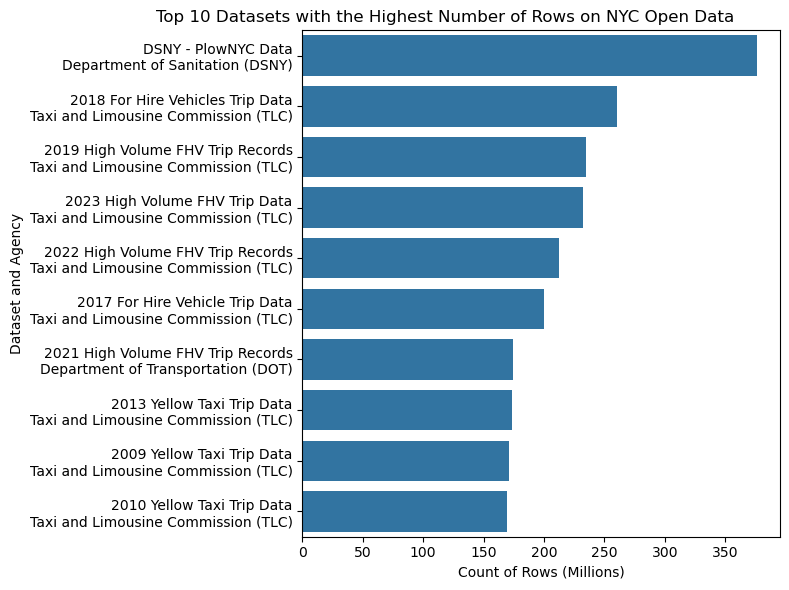

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

top_20 = (
    df
    .sort_values(by='count_rows', ascending=False)
    .loc[:, ['full_name', 'count_rows']]
    .head(10)
    .assign(count_rows_mm=df['count_rows'] / 1_000_000)
)

sns.barplot(
    data=top_20, 
    y='full_name', 
    x='count_rows_mm', 
    color='C0',
    ax=ax
)

plt.title(
    'Top 10 Datasets with the Highest Number of Rows on NYC Open Data',
    fontsize=12, x=.3
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/top-datasets.png', dpi=250, bbox_inches='tight')

In [22]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(20)
 .groupby(by=['category'])['id']
 .count()
 .sort_values(ascending=False)
)

category
Transportation     18
City Government     2
Name: id, dtype: int64

In [23]:
(df
 .sort_values(by='count_rows', ascending=False)
 .head(20)
 .groupby(by=['attribution'])['id']
 .count()
 .sort_values(ascending=False)
)

attribution
Taxi and Limousine Commission (TLC)    17
Department of Finance (DOF)             1
Department of Sanitation (DSNY)         1
Department of Transportation (DOT)      1
Name: id, dtype: int64

## Top 20 Largest Datasets Filtering Out Taxi Car Data

In [24]:
# exclude these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

(df
 .loc[~df['name'].str.contains('|'.join(taxi_car_data))]
 .sort_values(by='count_rows', ascending=False)
 .head(20)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted,full_name,createdAtYear
1869,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1860,506,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,Department of Sanitation (DSNY),DSNY - PlowNYC Data\nDepartment of Sanitation ...,2016
1991,nc67-uf89,Open Parking and Camera Violations,Department of Finance (DOF),The Open Parking and Camera Violations dataset...,117062807,241625,37310,City Government,"['dof', 'parking', 'summons', 'violation']",2016-01-04T16:08:38+0000,2024-03-15T17:35:08+0000,2024-08-25T02:09:24+0000,2024-03-15T17:35:08+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/nc67-uf89,https://data.cityofnewyork.us/resource/nc67-uf89,Department of Finance (DOF),Open Parking and Camera Violations\nDepartment...,2016
730,4fwc-j3vn,Weigh in Motion,NaN,A Weigh In Motion (WIM) system is designed to ...,97698569,1883,1301,Transportation,"['wim', 'weigh in motion', 'trucks', 'overweig...",2020-10-21T14:56:39+0000,2024-06-26T19:00:12+0000,2024-06-27T09:35:08+0000,2024-06-26T19:00:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/4fwc-j3vn,https://data.cityofnewyork.us/resource/4fwc-j3vn,NaN,Weigh in Motion\nN/A,2020
1938,wewp-mm3p,311 Call Center Inquiry,311,<b>Please note: Due to pandemic call handling ...,97046151,11130,23288,City Government,NaN,2016-05-12T22:58:27+0000,2024-01-24T21:32:54+0000,2024-08-25T01:07:06+0000,2024-01-24T21:32:54+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/wewp-mm3p,https://data.cityofnewyork.us/resource/wewp-mm3p,311,311 Call Center Inquiry\n311,2016
1815,i4gi-tjb9,DOT Traffic Speeds NBE,NaN,NaN,85740225,18695,6117,Transportation,NaN,2017-04-17T18:31:04+0000,2020-02-08T00:40:14+0000,2024-08-25T21:19:34+0000,2020-02-08T00:40:14+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/i4gi-tjb9,https://data.cityofnewyork.us/resource/i4gi-tjb9,NaN,DOT Traffic Speeds NBE\nN/A,2017
841,2nwg-uqyg,Emergency Department Visits and Admissions for...,Department of Health and Mental Hygiene (DOHMH),"Total emergency department visits, and visits ...",82021561,12807,2295,Health,"['emergency', 'emergency department', 'influen...",2020-04-28T18:50:14+0000,2023-01-19T17:00:22+0000,2022-12-05T19:34:43+0000,2023-01-19T17:00:22+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/2nwg-uqyg,https://data.cityofnewyork.us/resource/2nwg-uqyg,Department of Health and Mental Hygiene (DOHMH),Emergency Department Visits and Admissions for...,2020
1279,pbk5-6r7z,Street Construction Permits - Stipulations (Hi...,Department of Transportation (DOT),DOT issues over 150 different types of sidewal...,79933031,1523,894,Transportation,"['permit', 'street work', 'construction', 'cut...",2018-12-28T18:26:04+0000,2022-05-09T22:26:50+0000,2020-04-13T19:19:40+0000,2022-05-09T22:26:50+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/pbk5-6r7z,https://data.cityofnewyork.us/resource/pbk5-6r7z,Department of Transportation (DOT),Street Construction Permits - Stipulations (Hi...,2018
1017,scjx-j6np,DOF: Property Charges Balance,Department of Finance,Property related charge information by period.,75863671,6854,1150,City Government,"['charge balance', 'open balance', 'charge sum...",2019-07-16T18:49:01+0000,2024-06-06T18:59:51+0000,2024-06-06T19:22:43+0000,2024-06-06T18:59:51+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/scjx-j6np,https://data.cityofnewyork.us/resource/scjx-j6np,Department of Finance,DOF: Property Charges Balance\nDepartment of F...,2019
1353,quxm-hmyr,LinkNYC Kiosk St

In [25]:
# string is too long, we need to format it better
formatted_dataset = 'Emergency Department Visits and Admissions for\n\
Influenza-like Illness and/or Pneumonia\nDepartment of Health and Mental Hygiene (DOHMH)'

df.loc[df['id'] == '2nwg-uqyg', ['full_name']] = formatted_dataset

df.loc[df['id'] == '2nwg-uqyg', 'full_name'].values[0]

'Emergency Department Visits and Admissions for\nInfluenza-like Illness and/or Pneumonia\nDepartment of Health and Mental Hygiene (DOHMH)'

In [26]:
(df
.loc[~df['name'].str.contains('|'.join(taxi_car_data))]
.sort_values(by='count_rows', ascending=False)
.head(10)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted,full_name,createdAtYear
1869,rmhc-afj9,DSNY - PlowNYC Data,Department of Sanitation (DSNY),A table containing physical ID (a unique stree...,376404531,1860,506,City Government,"['dsny', 'plownyc', 'snow removal']",2016-10-20T21:06:59+0000,2024-05-30T14:38:12+0000,2024-02-17T22:22:44+0000,2024-05-30T14:38:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/rmhc-afj9,https://data.cityofnewyork.us/resource/rmhc-afj9,Department of Sanitation (DSNY),DSNY - PlowNYC Data\nDepartment of Sanitation ...,2016
1991,nc67-uf89,Open Parking and Camera Violations,Department of Finance (DOF),The Open Parking and Camera Violations dataset...,117062807,241625,37310,City Government,"['dof', 'parking', 'summons', 'violation']",2016-01-04T16:08:38+0000,2024-03-15T17:35:08+0000,2024-08-25T02:09:24+0000,2024-03-15T17:35:08+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/nc67-uf89,https://data.cityofnewyork.us/resource/nc67-uf89,Department of Finance (DOF),Open Parking and Camera Violations\nDepartment...,2016
730,4fwc-j3vn,Weigh in Motion,NaN,A Weigh In Motion (WIM) system is designed to ...,97698569,1883,1301,Transportation,"['wim', 'weigh in motion', 'trucks', 'overweig...",2020-10-21T14:56:39+0000,2024-06-26T19:00:12+0000,2024-06-27T09:35:08+0000,2024-06-26T19:00:12+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/4fwc-j3vn,https://data.cityofnewyork.us/resource/4fwc-j3vn,NaN,Weigh in Motion\nN/A,2020
1938,wewp-mm3p,311 Call Center Inquiry,311,<b>Please note: Due to pandemic call handling ...,97046151,11130,23288,City Government,NaN,2016-05-12T22:58:27+0000,2024-01-24T21:32:54+0000,2024-08-25T01:07:06+0000,2024-01-24T21:32:54+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/wewp-mm3p,https://data.cityofnewyork.us/resource/wewp-mm3p,311,311 Call Center Inquiry\n311,2016
1815,i4gi-tjb9,DOT Traffic Speeds NBE,NaN,NaN,85740225,18695,6117,Transportation,NaN,2017-04-17T18:31:04+0000,2020-02-08T00:40:14+0000,2024-08-25T21:19:34+0000,2020-02-08T00:40:14+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/i4gi-tjb9,https://data.cityofnewyork.us/resource/i4gi-tjb9,NaN,DOT Traffic Speeds NBE\nN/A,2017
841,2nwg-uqyg,Emergency Department Visits and Admissions for...,Department of Health and Mental Hygiene (DOHMH),"Total emergency department visits, and visits ...",82021561,12807,2295,Health,"['emergency', 'emergency department', 'influen...",2020-04-28T18:50:14+0000,2023-01-19T17:00:22+0000,2022-12-05T19:34:43+0000,2023-01-19T17:00:22+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/2nwg-uqyg,https://data.cityofnewyork.us/resource/2nwg-uqyg,Department of Health and Mental Hygiene (DOHMH),Emergency Department Visits and Admissions for...,2020
1279,pbk5-6r7z,Street Construction Permits - Stipulations (Hi...,Department of Transportation (DOT),DOT issues over 150 different types of sidewal...,79933031,1523,894,Transportation,"['permit', 'street work', 'construction', 'cut...",2018-12-28T18:26:04+0000,2022-05-09T22:26:50+0000,2020-04-13T19:19:40+0000,2022-05-09T22:26:50+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/pbk5-6r7z,https://data.cityofnewyork.us/resource/pbk5-6r7z,Department of Transportation (DOT),Street Construction Permits - Stipulations (Hi...,2018
1017,scjx-j6np,DOF: Property Charges Balance,Department of Finance,Property related charge information by period.,75863671,6854,1150,City Government,"['charge balance', 'open balance', 'charge sum...",2019-07-16T18:49:01+0000,2024-06-06T18:59:51+0000,2024-06-06T19:22:43+0000,2024-06-06T18:59:51+0000,data.cityofnewyork.us,NaN,https://data.cityofnewyork.us/d/scjx-j6np,https://data.cityofnewyork.us/resource/scjx-j6np,Department of Finance,DOF: Property Charges Balance\nDepartment of F...,2019
1353,quxm-hmyr,LinkNYC Kiosk St

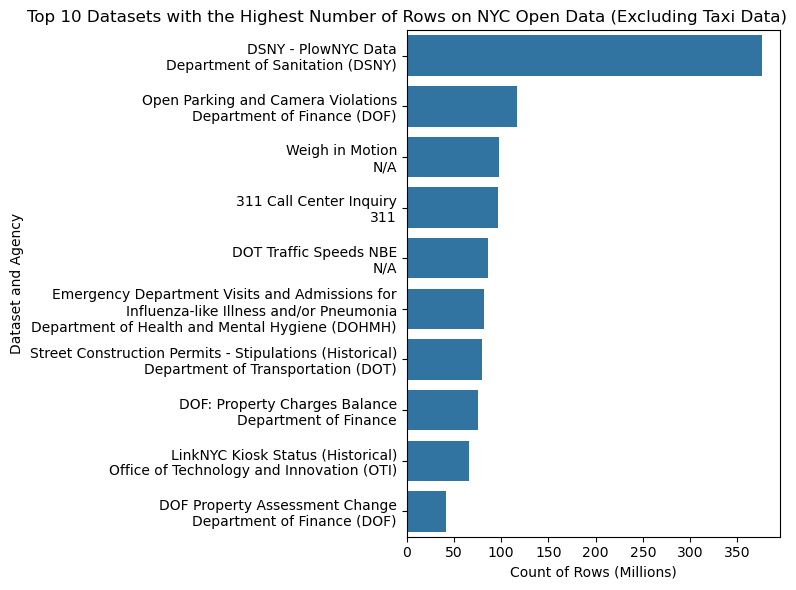

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# exclude these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

data = (
    df
    .loc[~df['name'].str.contains('|'.join(taxi_car_data)), ['full_name', 'count_rows']]
    .sort_values(by='count_rows', ascending=False)
    .head(10)
    .assign(count_rows_mm=df['count_rows'] / 1_000_000)
)

sns.barplot(
    data=data, 
    y='full_name', 
    x='count_rows_mm', 
    color='C0',
    ax=ax
)

plt.title(
    'Top 10 Datasets with the Highest Number of Rows on NYC Open Data (Excluding Taxi Data)',
    fontsize=12, x=.0
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/top-no-taxi.png', dpi=250, bbox_inches='tight')

## Top 20 Largest Datasets with Taxi Car Data

In [28]:
# include these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

(df
 .loc[df['name'].str.contains('|'.join(taxi_car_data))]
 .sort_values(by='count_rows', ascending=False)
 .head(20)
)

,id,name,attribution,description,count_rows,viewCount,downloadCount,category,tags,createdAt,updatedAt,dataUpdatedAt,metadataUpdatedAt,domain,attributionLink,webUri,dataUri,attribution_formatted,full_name,createdAtYear
1420,am94-epxh,2018 For Hire Vehicles Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,260766056,3142,1009,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-09-17T20:40:48+0000,2023-12-15T15:05:40+0000,2019-04-17T18:58:46+0000,2023-12-15T15:05:40+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/am94-epxh,https://data.cityofnewyork.us/resource/am94-epxh,Taxi and Limousine Commission (TLC),2018 For Hire Vehicles Trip Data\nTaxi and Lim...,2018
983,4p5c-cbgn,2019 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),NaN,234629119,3684,1433,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2019-09-20T14:15:36+0000,2023-12-15T16:10:36+0000,2020-03-06T19:30:26+0000,2023-12-15T16:10:36+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/4p5c-cbgn,https://data.cityofnewyork.us/resource/4p5c-cbgn,Taxi and Limousine Commission (TLC),2019 High Volume FHV Trip Records\nTaxi and Li...,2019
8,u253-aew4,2023 High Volume FHV Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,232490020,234,28,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2024-07-02T13:34:52+0000,2024-07-16T18:41:11+0000,2024-07-15T17:29:03+0000,2024-07-16T18:40:12+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/u253-aew4,https://data.cityofnewyork.us/resource/u253-aew4,Taxi and Limousine Commission (TLC),2023 High Volume FHV Trip Data\nTaxi and Limou...,2024
88,g6pj-fsah,2022 High Volume FHV Trip Records,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,212416083,1181,483,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-11-01T15:11:25+0000,2023-12-15T15:59:25+0000,2023-11-08T14:43:26+0000,2023-12-15T15:53:18+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/g6pj-fsah,https://data.cityofnewyork.us/resource/g6pj-fsah,Taxi and Limousine Commission (TLC),2022 High Volume FHV Trip Records\nTaxi and Li...,2023
1553,avz8-mqzz,2017 For Hire Vehicle Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the For-Hire ...,200283593,3873,1018,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2018-03-08T21:15:31+0000,2023-12-15T15:01:45+0000,2018-10-22T16:11:25+0000,2023-12-15T15:01:45+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/avz8-mqzz,https://data.cityofnewyork.us/resource/avz8-mqzz,Taxi and Limousine Commission (TLC),2017 For Hire Vehicle Trip Data\nTaxi and Limo...,2018
95,5ufr-wvc5,2021 High Volume FHV Trip Records,Department of Transportation (DOT),These records are generated from the trip reco...,174596652,400,201,Transportation,"['taxi', 'trip data', 'fhv', 'trip', 'base', '...",2023-10-25T15:18:34+0000,2023-12-15T15:59:23+0000,2023-10-31T11:46:29+0000,2023-12-15T15:58:59+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://data.cityofnewyork.us/d/5ufr-wvc5,https://data.cityofnewyork.us/resource/5ufr-wvc5,Department of Transportation (DOT),2021 High Volume FHV Trip Records\nDepartment ...,2023
2028,t7ny-aygi,2013 Yellow Taxi Trip Data,Taxi and Limousine Commission (TLC),These records are generated from the trip reco...,173179759,1219,356,Transportation,"['yellow taxi', 'trip data', 'fhv', 'trip', 'b...",2015-10-16T21:58:37+0000,2023-12-14T20:44:38+0000,2015-11-12T18:38:36+0000,2023-12-14T20:44:38+0000,data.cityofnewyork.us,https://www.nyc.gov/site/tlc/about/tlc-trip-re...,https://

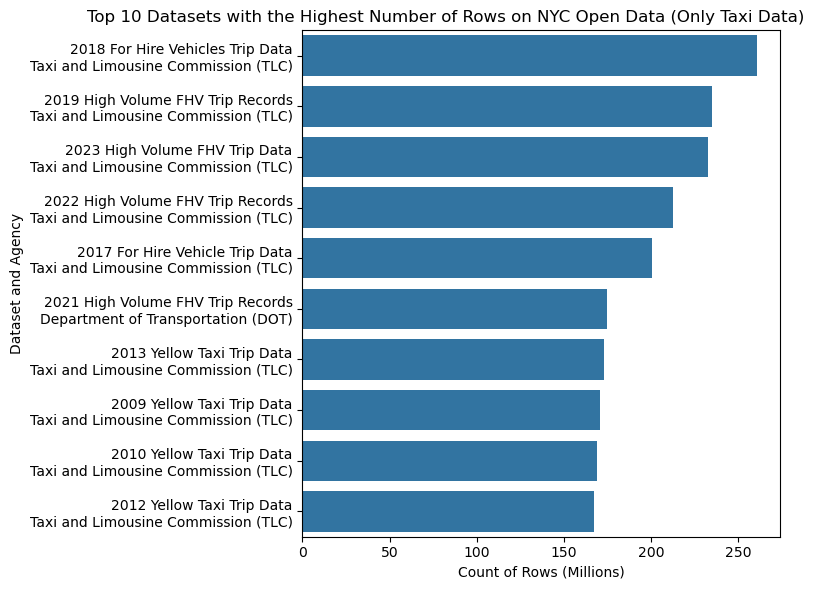

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

# include these strings
taxi_car_data = [
    'High Volume FHV Trip',
    'For Hire Vehicle',
    'Taxi Trip',
    'Medallion'
]

data = (
    df
    .loc[df['name'].str.contains('|'.join(taxi_car_data))]
    .sort_values(by='count_rows', ascending=False)
    .head(10)
    .assign(count_rows_mm=df['count_rows'] / 1_000_000)
)


sns.barplot(
    data=data, 
    y='full_name', 
    x='count_rows_mm', 
    color='C0',
    ax=ax
)

plt.title(
    'Top 10 Datasets with the Highest Number of Rows on NYC Open Data (Only Taxi Data)',
    fontsize=12, x=.3
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Dataset and Agency')

plt.tight_layout()
plt.savefig('figures/top-taxi-data.png', dpi=250, bbox_inches='tight')

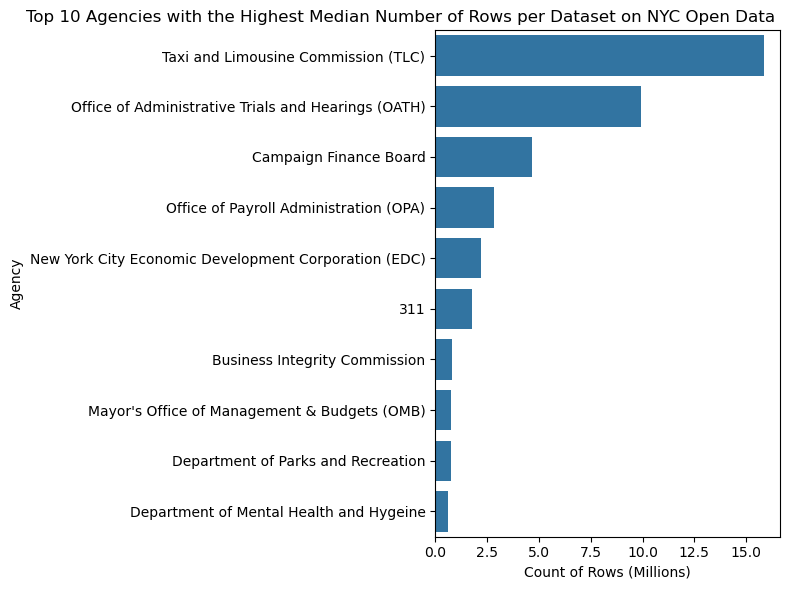

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .groupby(by='attribution_formatted')['count_rows']
    .median()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


sns.barplot(
    x=data['count_rows'] / 1_000_000, 
    y=data['attribution_formatted'],
    ax=ax,
    color='C0'
)

plt.title(
    'Top 10 Agencies with the Highest Median Number of Rows per Dataset on NYC Open Data',
    fontsize=12, x=-.10
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Agency')

plt.tight_layout()
plt.savefig('figures/agency-median-rows.png', dpi=250, bbox_inches='tight')

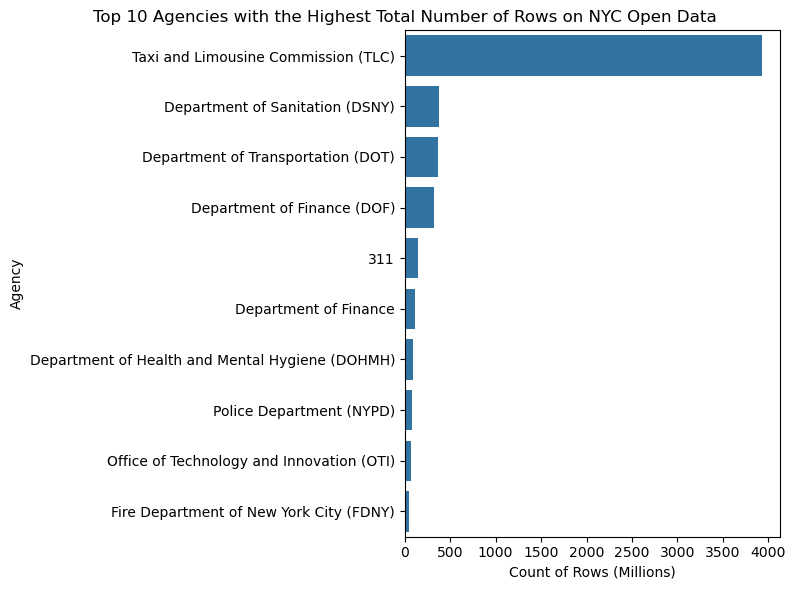

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .groupby(by='attribution_formatted')['count_rows']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


sns.barplot(
    x=data['count_rows'] / 1_000_000, 
    y=data['attribution_formatted'],
    ax=ax,
    color='C0'
)

plt.title(
    'Top 10 Agencies with the Highest Total Number of Rows on NYC Open Data',
    fontsize=12, x=-.0
)
plt.xlabel('Count of Rows (Millions)')
plt.ylabel('Agency')

plt.tight_layout()
plt.savefig('figures/agency-sum-rows.png', dpi=250, bbox_inches='tight')

# Visualizing Distributions and Relationships

In [32]:
df.describe().round(1)

,count_rows,viewCount,downloadCount,createdAtYear
count,2491.0,2491.0,2491.0,2491.0
mean,2394917.3,11144.8,4628.5,2018.1
std,18310056.7,108547.1,41030.5,3.2
min,1.0,51.0,9.0,2011.0
25%,162.0,378.0,383.5,2016.0
50%,1531.0,859.0,805.0,2019.0
75%,12759.5,2626.5,2119.5,2020.0
max,376404531.0,2813069.0,1664776.0,2024.0


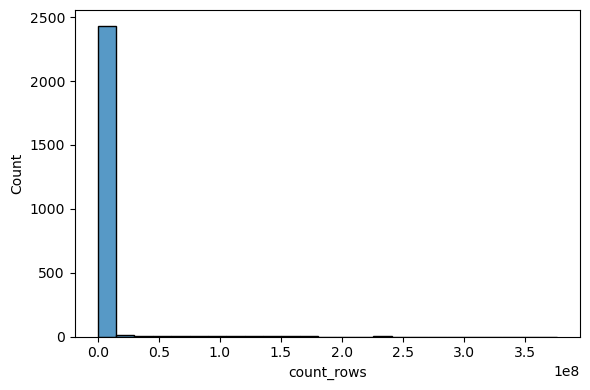

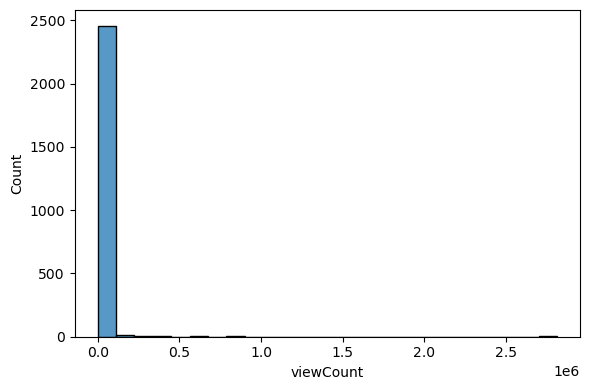

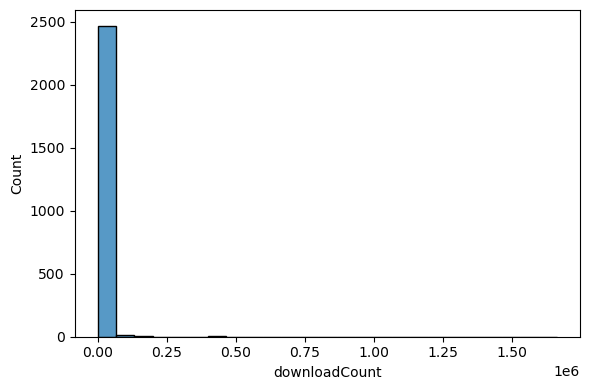

In [33]:
cols = [
    'count_rows',
    'viewCount',
    'downloadCount'
]

for col in cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(df[col], ax=ax, bins=25)
    
    plt.tight_layout()

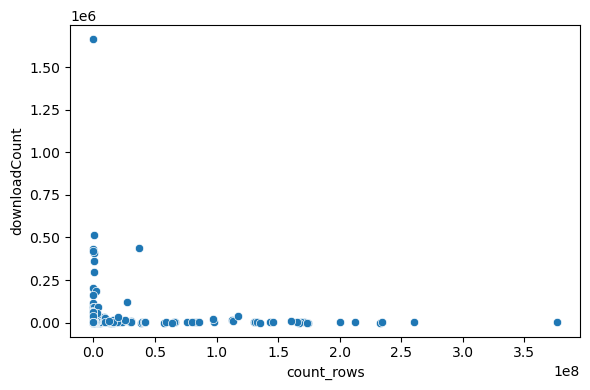

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['count_rows'],
    y=df['downloadCount'],
    ax=ax
)

plt.tight_layout()

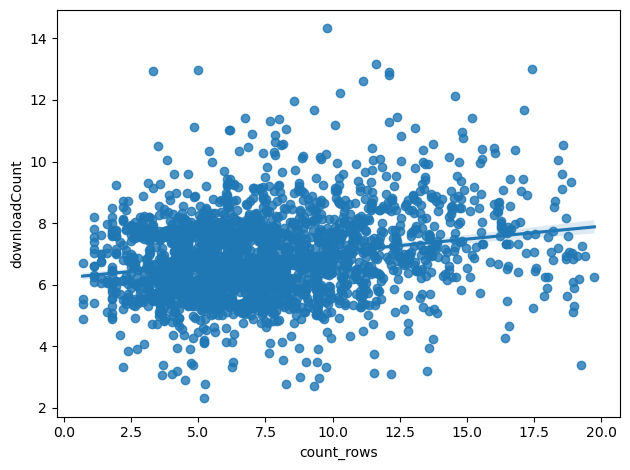

In [35]:
sns.regplot(
    x=np.log(df['count_rows'] + 1),
    y=np.log(df['downloadCount'] + 1)
)

plt.tight_layout()

In [36]:
df.loc[df['count_rows'].between(0, 100_000, inclusive='right'), 'rows_bin'] = '(0, 100,000]'
df.loc[df['count_rows'].between(100_000, 1_000_000, inclusive='right'), 'rows_bin'] = '(100,000, 1,000,000]'
df.loc[df['count_rows'].between(1_000_000, 100_000_000, inclusive='right'), 'rows_bin'] = '(1,000,000, 100,000,000]'
df.loc[df['count_rows'] > 100_000_000, 'rows_bin'] = '> 100,000,000'

In [37]:
df.groupby(by=['rows_bin'])['count_rows'].describe()

,count,mean,std,min,25%,50%,75%,max
rows_bin,,,,,,,,
"(0, 100,000]",2165.0,6.832314e+03,1.629354e+04,1.0,1.120000e+02,780.0,3.319000e+03,99815.0
"(1,000,000, 100,000,000]",133.0,1.521745e+07,2.197724e+07,1008688.0,2.097150e+06,5546569.0,1.583700e+07,97698569.0
"(100,000, 1,000,000]",171.0,3.950457e+05,2.536786e+05,100107.0,1.804230e+05,315721.0,5.993160e+05,963932.0
"> 100,000,000",22.0,1.754306e+08,6.071688e+07,112234626.0,1.334570e+08,166222834.5,1.938619e+08,376404531.0


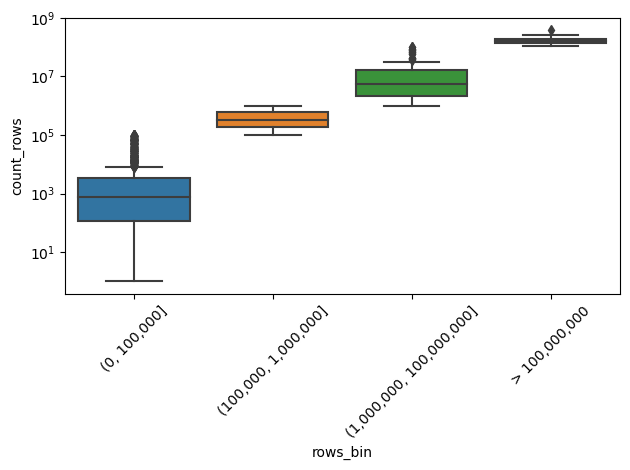

In [38]:
order = [
    '(0, 100,000]',
    '(100,000, 1,000,000]',
    '(1,000,000, 100,000,000]',
    '> 100,000,000',
]
          
sns.boxplot(
    data=df,
    x='rows_bin',
    y='count_rows',
    order=order
)

plt.yscale('log')
plt.xticks(rotation=45)

plt.tight_layout()

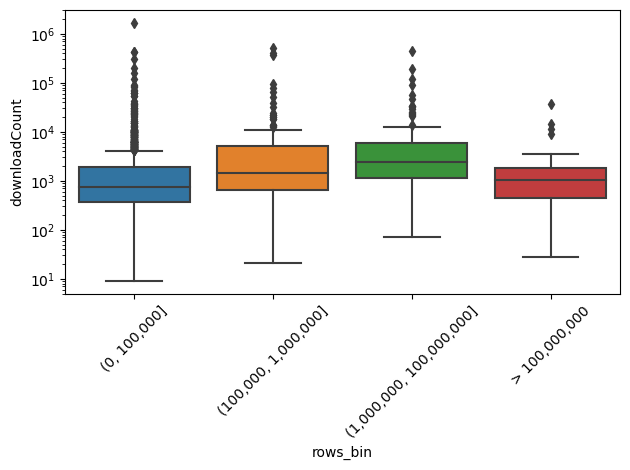

In [39]:
order = [
    '(0, 100,000]',
    '(100,000, 1,000,000]',
    '(1,000,000, 100,000,000]',
    '> 100,000,000',
]

sns.boxplot(
    data=df,
    x='rows_bin',
    y='downloadCount',
    order=order
)

plt.yscale('log')
plt.xticks(rotation=45)

plt.tight_layout()

# Estimating central tendency

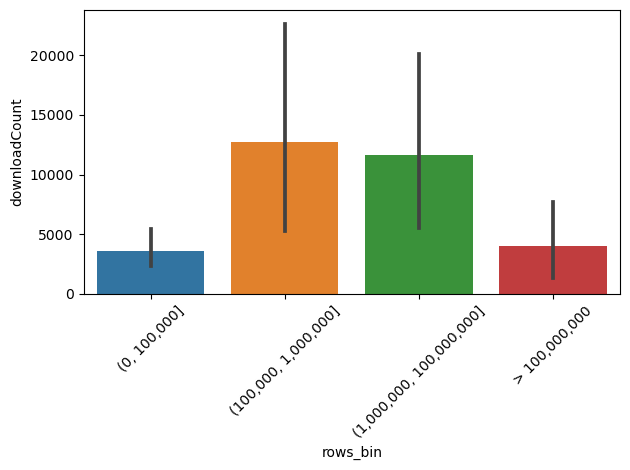

In [40]:
order = [
    '(0, 100,000]',
    '(100,000, 1,000,000]',
    '(1,000,000, 100,000,000]',
    '> 100,000,000',
]

sns.barplot(
    data=df,
    x='rows_bin',
    y='downloadCount',
    order=order
)

plt.xticks(rotation=45)

plt.tight_layout()

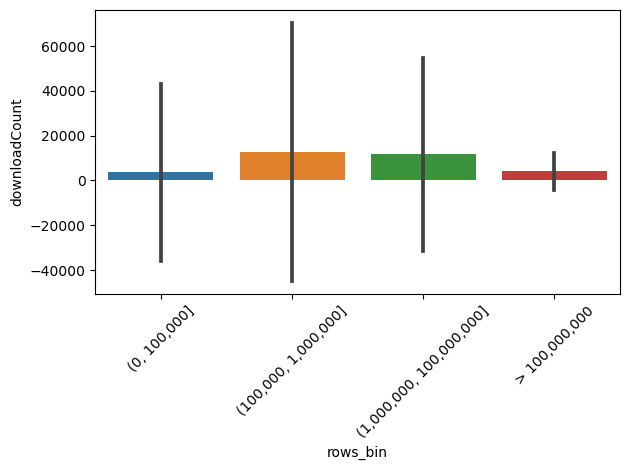

In [41]:
order = [
    '(0, 100,000]',
    '(100,000, 1,000,000]',
    '(1,000,000, 100,000,000]',
    '> 100,000,000',
]

sns.barplot(
    data=df,
    x='rows_bin',
    y='downloadCount',
    order=order,
    errorbar='sd'
)

plt.xticks(rotation=45)

plt.tight_layout()